<a href="https://colab.research.google.com/github/AthinaRA/aruldass21_BBI_BIODEP/blob/main/Cyto200_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#!conda install -c conda-forge xgboost

!pip install xgboost==1.4

     |████████████████████████████████| 166.7 MB 52 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change dir
# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks/Spark_Cyto_Colab/"

# change the OS to use your project folder as the working directory
os.chdir(root_dir + project_folder)

In [4]:
# check current dir
!pwd

/content/drive/My Drive/Colab Notebooks/Spark_Cyto_Colab


In [5]:
#Load data
df = pd.read_csv("./spark_prelog_cytoPLASMA.csv",header=0,sep=',')
#df.head()

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **PREPROCESSING: DATA PREP**

In [6]:
# rename cols with shorter names 
df.columns # to check col names
list(df.columns) # to get list names 

df.columns = ['Record.ID','Centre','Study.Arm','Sex','BMI','Age','crpGroup','CRP','Eotaxin','Eotaxin3',
 'GMCSF','IFNg','IL10','IL13','IL15','IL16','IL17','IL1b','IL2','IL4','IL5','IL6','IL7','IL8','IP10',
 'MCP1','MCP4','MDC','MIP1a','MIP1b','TARC','TNFa','TNFb','VEGF']


In [7]:
df.dtypes # float64 is numeric chr w decimals

# VEGF and Eotx are 'object' here - there are str "Complete" entries, not all numeric
#df.loc[:,'VEGF.plasma'] # use 'label' location

Record.ID      int64
Centre        object
Study.Arm     object
Sex           object
BMI           object
Age          float64
crpGroup      object
CRP          float64
Eotaxin       object
Eotaxin3     float64
GMCSF        float64
IFNg         float64
IL10         float64
IL13         float64
IL15         float64
IL16         float64
IL17         float64
IL1b         float64
IL2          float64
IL4          float64
IL5          float64
IL6          float64
IL7          float64
IL8          float64
IP10         float64
MCP1         float64
MCP4         float64
MDC          float64
MIP1a        float64
MIP1b        float64
TARC         float64
TNFa         float64
TNFb         float64
VEGF          object
dtype: object

In [8]:
# convert VEGF Eotx to NaN
#df.loc[insert row,'VEGF.plasma'] = np.NaN
df.loc[df['VEGF'] == 'Complete', 'VEGF'] = np.NaN
df.loc[df['Eotaxin'] == 'Incomplete', 'Eotaxin'] = np.NaN

# still retains original dtype - you will have to reset !!
# check df
df.dtypes # why are Eotx VEGF still object 

Record.ID      int64
Centre        object
Study.Arm     object
Sex           object
BMI           object
Age          float64
crpGroup      object
CRP          float64
Eotaxin       object
Eotaxin3     float64
GMCSF        float64
IFNg         float64
IL10         float64
IL13         float64
IL15         float64
IL16         float64
IL17         float64
IL1b         float64
IL2          float64
IL4          float64
IL5          float64
IL6          float64
IL7          float64
IL8          float64
IP10         float64
MCP1         float64
MCP4         float64
MDC          float64
MIP1a        float64
MIP1b        float64
TARC         float64
TNFa         float64
TNFb         float64
VEGF          object
dtype: object

In [9]:
#check if there are anymore strings 
#list(df.loc[:,'VEGF']) 
#list(df.loc[:,'Eotaxin']) 

In [10]:
#convert data type for problem cols
df = df.astype({'VEGF': np.float64, 'Eotaxin': np.float64})

# OR df['VEGF'] = df['VEGF'].astype(np.float64) # you have to import float64 from numpy (np)

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **PREPROCESSING: NORMALIZATION & STANDARDIZATION**

In [11]:
# log10 transfrom / normalize
df_log = np.log10(df.iloc[:,7:35]) # use iloc to subset range of columns by index, RMBR : iloc X include upper val ie col 11 not included. So say 12 to include
#df_log.head()

# OR from sklearn library --> from sklearn import preprocessing, df = preprocessing.normalize(df)
    
    
# Example from web to calculate logarithm to base 2 on 'Salary' column > to new col 'new_logbase2' in df called data
#data['new_logbase2'] = np.log2(data['Salary'])
#df_log = np.log10(df.iloc[:,[7,11]]) # to select cols 7 AND 11  
# OR
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#for c in [c for c in df.columns if df[c].dtype in numerics]:
    #df_[c] = np.log10(df[c])

In [12]:
#  z transform / standardize / scaling
df_z = (df_log - df_log.mean())/(df_log.std())  # use iloc to subset range of columns by index, RMBR : iloc X include upper val ie col 11 not included. So say 12 to include
#df_z.head()

#data_z = (data-data.mean())/(data.std())

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **DATA EXPLORATION: BOXPLOT & DENSITY CURVES**

[(-1.0, 1.0)]

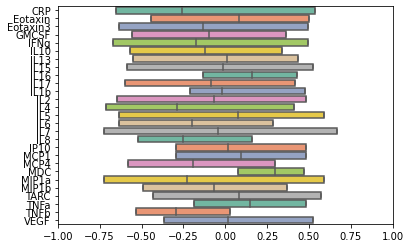

In [13]:
#df.describe()

# plot boxplot
#df_z = df_z.iloc[:,7:35]
ax = sb.boxplot(data=df_z, orient="h", palette="Set2", showfliers=False, whis=0) #fliers is outliers, whis is whiskers
ax.set(xlim=(-1, 1))

# or using import matplotlib.pyplot as plt; plt.ylim(10, 40)

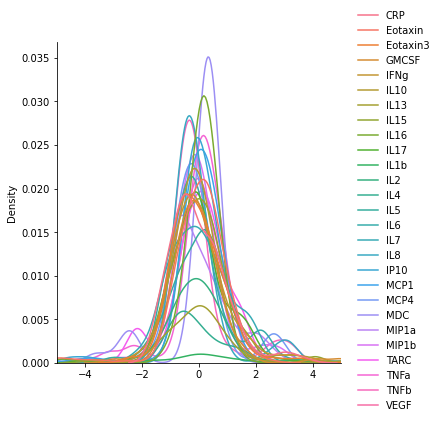

In [14]:
bx = sb.displot(df_z, kind="kde")
bx.set(xlim=(-5, 5))

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **DATA EXPLORATION: RIDGELINE PLOT**

In [15]:
# RIDGELINE PLOT
#unlike in ggridges R, it takes a a few lines to build here

# first copy dataframe
df_z2 = df_z.copy()

#melt it into long format
df_z2 = pd.melt(df_z2)
df_z2

,variable,value
0,CRP,-1.142719
1,CRP,0.200250
2,CRP,-1.142719
3,CRP,-0.003400
4,CRP,0.163939
...,...,...
5611,VEGF,-0.996613
5612,VEGF,-0.662962
5613,VEGF,-0.327122
5614,VEGF,-1.661385


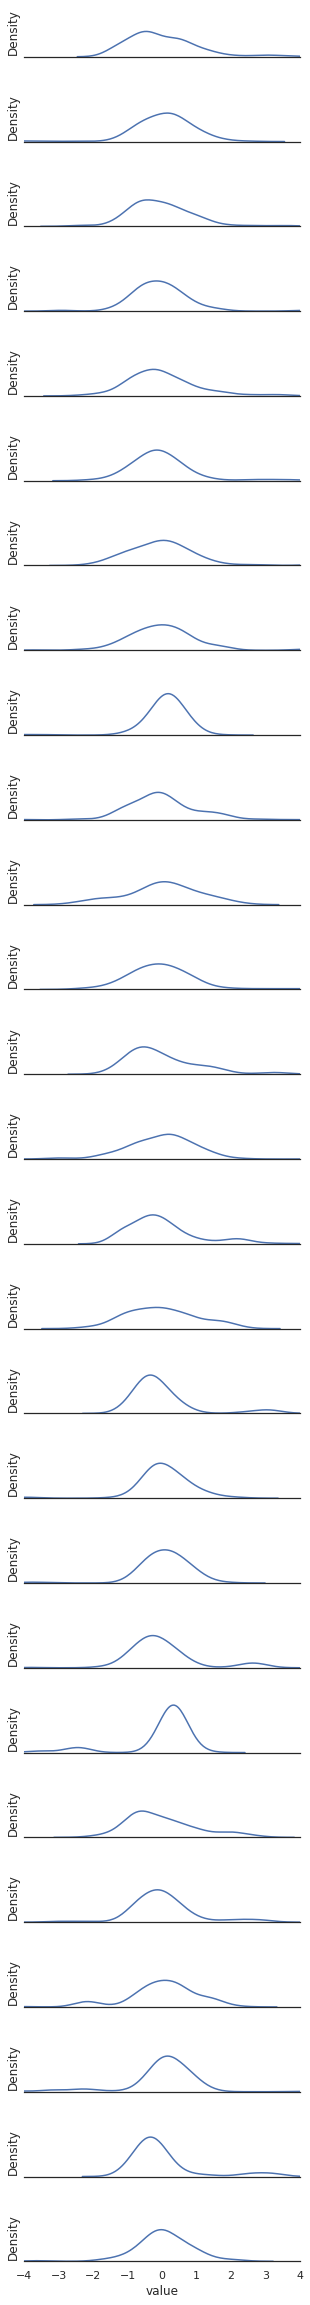

In [16]:
sb.set_theme(style="white")
cx = sb.FacetGrid(df_z2, row='variable', aspect=4, height=1.2) # df must be in longform ie col = variables , row = observations
cx.map_dataframe(sb.kdeplot, x='value')
cx.set_titles("")
cx.set(yticks=[])
cx.set(xlim=(-4, 4))
cx.despine(left=True)

In [ ]:
# FINE-TUNING RIDGELINE PLOT

# get colours
import sys
!{sys.executable} -m pip install colorcet # install a pip package in the current Jupyter kernel
import colorcet as cc # this lib can accom more qualitative / categorical colours
palette = sb.color_palette(cc.glasbey_dark, n_colors=27)

In [ ]:
# re-initialize the FacetGrid object
sb.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}) # axis bg opacity = transparent 
dx = sb.FacetGrid(df_z2, row="variable", palette=palette, hue="variable", aspect=5, height=0.5) # main plot
# hue in sb = third category for data point e.g. akin to colouring data points in scatterplot

# build plot
dx.map_dataframe(sb.kdeplot, x="value", fill=True, alpha=1) # fill 
dx.map_dataframe(sb.kdeplot, x="value", color='black') 

# Define and use a simple function to label the plot in axes coordinates
import matplotlib.pyplot as plt
def label(x, color, label):
    ax = plt.gca() #from pyplot
    ax.text(0, .2, label, color='black', fontsize=7,
            ha="left", va="center", transform=ax.transAxes)

dx.map(label, "variable") # to iterative run function e.g. label, using arguments supplied


# adjust / set things
dx.fig.subplots_adjust(hspace=-.5) # to make plots overlap 
dx.set_titles("") # remove titles for subplot
#dx.set(ylabel=None)  # remove the axis label ie "Density"
dx.set(yticks=[], xlabel="scaled concentrations", ylabel=None, xlim=(-4, 4)) # you can condense all .set para in one
dx.despine(left=True)

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **DATA EXPLORATION: CORRELATION HEATMAP**

In [ ]:
# CORR HEATMAP
df_z.corr() # to make a df x df correlation
sb.heatmap(df_z.corr())

In [ ]:
# INITIALIZE corr df

# make a function that plots corr matrix and thresholds w 'mask' arg that masks corr where p-val > 0.05 
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sb.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=False, vmin=-1, vmax=1, center=0, #annot to show r
                cmap='coolwarm', linewidths=2, linecolor='white', cbar_kws={'orientation': 'horizontal'})
    
# plot without signif thresholding
hx = df_z.corr()
mask = np.triu(hx) # get upper tri
plot_cor_matrix(hx,mask)
#plt.show()

In [ ]:
# FINE-TUNING HEATMAP  ## not NaN tolerant (FAILED)

# define fxn to extract p-value
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            r , p = stats.pearsonr(df[col],df[col2]) # this is from scipy.stats.pearsonr, spits r and p-val
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p 
    return p_matrix


# Plotting with significance filter
ix = df_z.corr()                            # get correlation
p_values = corr_sig(df_z)                   # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr, tril = lower tri, invert =
plot_cor_matrix(ix,mask)  

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **CLASSIFICATION**

In [17]:
######## Try XGBoost classifier ###############

# importing libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [18]:
#!pip3 install xgboost # install a pip package in the current Jupyter kernel
# XGB installed at the start
from xgboost import XGBClassifier

In [19]:
# DEFINE FEATURES
X = df_z # 208 x 27


# DEFINE LABELS / ONE-HOT ENCODING (for categorical vars)
y = df[["crpGroup"]] # 208 x 1

# initialize (encode labels with value between 0 and n_classes-1)
le = preprocessing.LabelEncoder()

# fit and transform (use df.apply() to apply le.fit_transform to all columns e.g. to X)
y2 = y.apply(le.fit_transform)
y2.head()  #Low inflammation = 1; High inflammation = 0

,crpGroup
0,1
1,1
2,1
3,1
4,1


In [20]:
#split in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=1) 

#test size; 30% is held out for test/validation, random sate 

In [21]:
# define base model 
model = XGBClassifier() #does not have specific configs

In [ ]:
#from  sklearn.tree import  DecisionTreeClassifier
#model = DecisionTreeClassifier()

In [22]:
# fit model on training data
model.fit(X_train, y_train) # there are many hyperparameters - general, booster, learning, 

[18:11:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
X_train.head()

,CRP,Eotaxin,Eotaxin3,GMCSF,IFNg,IL10,IL13,IL15,IL16,IL17,...,IP10,MCP1,MCP4,MDC,MIP1a,MIP1b,TARC,TNFa,TNFb,VEGF
194,3.284777,-4.922662,-2.126749,5.002137,NaN,2.841461,NaN,4.038698,-7.230878,1.780885,...,-4.522090,-4.561085,-0.724282,-3.642443,2.082699,-3.072460,-3.995936,-0.305946,2.250389,-7.908637
55,-0.652041,-0.481929,0.417924,-0.429371,0.793096,-0.241173,NaN,-0.723612,0.265460,0.175795,...,0.262403,0.035336,-0.429478,-0.129951,-0.581800,-0.356353,-0.293266,0.829038,-0.124485,0.603230
93,0.234788,0.147242,1.389456,NaN,0.473400,-1.216430,NaN,-1.250300,1.083490,-4.176307,...,-0.276916,0.460838,2.804782,-2.582105,2.208957,2.548937,-2.126244,-4.279440,3.225073,NaN
53,-1.429747,2.513103,3.606126,0.131133,-0.281665,-0.971926,-0.389054,-0.448787,-0.333966,-0.837618,...,0.540688,1.948508,1.916971,0.348988,-0.170221,0.193940,1.475118,-0.123743,NaN,0.765132
97,1.249076,-0.486180,-0.353164,NaN,-0.110069,-0.904219,-0.122453,1.192574,0.111630,-0.442500,...,0.039744,-0.259916,-0.869933,0.199428,-1.633121,-0.827554,-0.178118,0.464988,-1.093546,0.628036


In [24]:
# predict / apply on test data
y_pred = model.predict(X_test) # only provide X, because y_test contains our answer labels
y_pred

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [25]:
y_test.head()

,crpGroup
186,1
155,0
165,1
200,1
58,1


In [26]:
# check answer / accuracy 
accuracy = accuracy_score(y_test, y_pred)
accuracy  

1.0

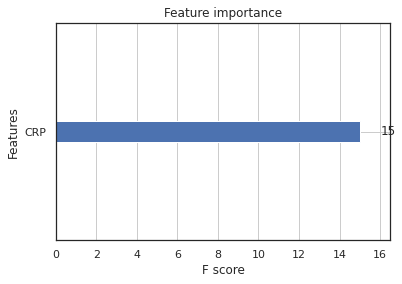

In [28]:
# FEATURE IMPORTANCE PLOT
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model) # plots loadings, you can also make it yourself. But this is from XGB
pyplot.show()

Accuracy is 100% and weighting is high on CRP because CRP levels = labels, ie you've already included answer on your training X.

In [29]:
########## rerun w new model - w/o CRP as feature col ########

# DEFINE FEATURES
X_2 = df_z.iloc[: , 1:] # 208 x 26 # from col 1 onwards selected, col 0 is dropped
X_2

,Eotaxin,Eotaxin3,GMCSF,IFNg,IL10,IL13,IL15,IL16,IL17,IL1b,...,IP10,MCP1,MCP4,MDC,MIP1a,MIP1b,TARC,TNFa,TNFb,VEGF
0,1.210629,-0.002150,0.121644,0.569337,-0.117863,0.847968,0.670539,0.684703,-1.048995,-0.097378,...,0.602269,0.877362,2.715387,-2.781593,1.261296,2.301529,-2.347156,-4.026748,2.546643,NaN
1,-0.363245,0.076020,-0.557759,-0.282099,-0.202743,NaN,-0.587835,-0.111966,0.826708,NaN,...,-0.089219,0.057617,-0.607317,0.556840,-1.012764,-0.174901,0.278647,0.118752,-0.265377,-0.194549
2,1.287081,-0.123481,-1.376693,-1.338247,-0.500252,NaN,0.166955,0.628799,-1.956701,NaN,...,-0.170542,0.248868,0.143974,0.406764,NaN,0.287116,1.463617,-0.285051,-0.970779,0.394306
3,-0.919791,-0.236115,-0.433784,0.037164,-0.583569,NaN,-0.488447,0.317450,-0.923244,NaN,...,0.015432,-0.744859,-0.675338,0.485417,-0.405231,-0.348972,-0.827640,-0.068868,-0.878153,-0.368941
4,0.554357,0.549172,-1.044847,0.326401,0.710306,0.298722,-1.615116,-0.390942,-0.838140,NaN,...,-0.047465,0.253225,-0.942244,0.075451,-0.451006,-0.029038,-0.546272,-0.070114,-0.776131,1.758514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.394650,-0.666951,1.733543,2.529972,0.846074,0.068722,-0.141159,0.074867,0.173285,NaN,...,1.111525,0.509488,-0.133339,0.277205,1.372450,-0.067543,-0.112919,0.786119,-0.054592,-0.996613
204,-1.024549,-0.135605,-0.166915,0.275604,-0.586230,-0.031536,0.510206,-0.443499,NaN,NaN,...,0.501690,0.382548,0.435031,0.059868,0.919473,0.051132,0.079879,0.245427,0.045471,-0.662962
205,-1.516069,-0.787921,0.531835,-0.064753,-1.205060,NaN,-1.000935,-0.477752,-0.358120,NaN,...,-0.196796,-0.055504,-0.409100,-0.047810,-0.035293,0.295767,-0.441234,-0.266343,-0.009556,-0.327122
206,-0.463606,0.074020,-0.160550,-0.175215,0.067377,NaN,-2.439246,-0.328325,NaN,NaN,...,-0.044947,0.377341,0.077046,0.301837,0.723295,0.272863,0.199809,0.618983,-1.055253,-1.661385


In [30]:
#split in train and test 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y2, test_size=0.3, random_state=1) 

In [31]:
# fit model on new data
model.fit(X_train2, y_train2)

[18:13:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# predict / apply on test data
y_pred2 = model.predict(X_test2) # only provide X, because y_test contains our answer labels
y_pred2

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [36]:
# REAL answers / labels (Low inflammation = 1, High inflammation = 0) # classes are not balanced ie 50-50
unique, counts = np.unique(y_test2, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 14],
       [ 1, 49]])

In [37]:
# ACCURACY (total correct preds / total number of predictions; [TP + TN] / [TP + TN + FP + FN])
accuracy = accuracy_score(y_test2, y_pred2)
accuracy  

0.7301587301587301

Accuracy of 0.73 or 73% appears good. But, this is a class-imbalanced dataset (see previous cell with true label counts) ie there is a significant disparity between the number of positive(1) and negative(0) labels. So, in an imbalanced dataset, high accuracy could be heavily weighted or biased on accuracy of prediction of one label over another, when in reality - for the other (smaller) class - correct classification was actually poor.

Better metrics for imbalanced dataset: *Precision* and *Recall*.

In [34]:
# Report with all metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2)) # ground truth labels vs prediction by classifier

              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.86      0.78      0.82        49

    accuracy                           0.73        63
   macro avg       0.64      0.67      0.65        63
weighted avg       0.77      0.73      0.74        63



Typically, recall and precision for label=1 (in this case "Low inflammation") is more commonly examined rather for both labels.

In [45]:
# RECALL (SENSITIVITY) - proportions of True Pos from all ACTUAL positives (here TP is label=1) [formula: TP / (TP + FN)]
from sklearn.metrics import recall_score 
recall_score(y_test2,y_pred2)

0.7755102040816326

Our model has a recall of 0.78 - it correctly identified 78% of "Low inflammation" MDD patients. *(see normalized confusion matrix - corresponds with LowerRight quadrant; TP)*.

In [46]:
# PRECISION - proportions of True Pos from all IDENTIFIED as positive (here TP is label=1) [formula: TP / (TP + FP)]
from sklearn.metrics import precision_score 
precision_score(y_test2,y_pred2)

0.8636363636363636

Our model has a precision of 0.86 - in other words, when it predicts "low inflammation" in an MDD patient or classifies an MDD patient as "Low inflammation", it is correct 86% of the time.

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


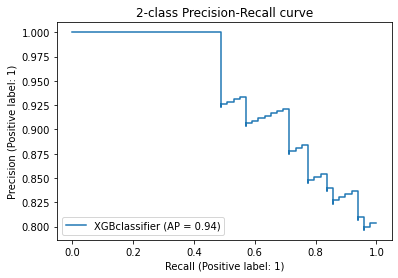

In [29]:
# PRECISION-RECALL CURVE (for 2-labels/ binary classifier) https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, X_test2, y_test2, name="XGBclassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve") 

# model is your classifer defined earlier / fitted to data


Interpretation: this curve is useful to examine trade-off in precision made when desiring high recall. From this curve, as recall increases ( > 0.5 or 50%), there is a sharp decline in precision. However, because XGB is a good model, here you are able to attain 1.0 or 100% recall *without* comprising too much on precision ie you still get precision approx 81% at recall 100%. 

In [30]:
# CONFUSION MATRIX ie indication of errors in classification / "confusion" experienced by classifier

from sklearn.metrics import confusion_matrix
 
expected = y_test2
predicted = y_pred2
#results = confusion_matrix(expected, predicted)
#print(results)
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
tn, fp, fn, tp

(8, 6, 11, 38)

Confusion matrix, without normalization
[[ 8  6]
 [11 38]]
Normalized confusion matrix
[[0.57142857 0.42857143]
 [0.2244898  0.7755102 ]]


/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


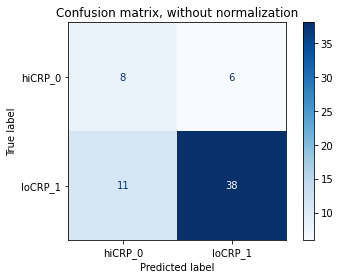

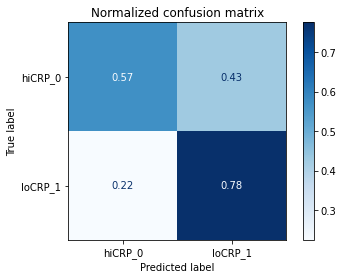

In [31]:
# Confusion matrix plot 

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ["hiCRP_0", "loCRP_1"] # 1 = positive, 0 = negative... how do labels work ?

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test2,
        y_test2,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plt.show() # UpperL = TN, LowerL = FN, UR = FP, LR = TP (see if it matches output in prev cell)

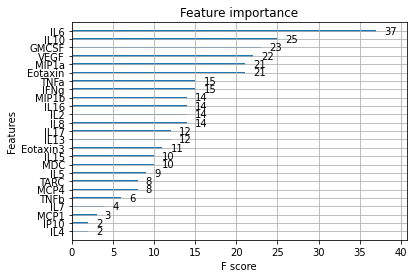

In [32]:
# FEATURE IMPORTANCE
plot_importance(model) # check form xgb, normalize the F_score 
pyplot.show()

After dropping CRP (feature that label was derived from), IL6 is(quite accurately) weighing heavily towards label prediction. CRP is biologically highly correlated w IL6. 

F-score (aka F1-score) 

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ **CLUSTERING**

In [33]:
############## CLUSTERING W GMM ################

#load libraries
from sklearn.impute import SimpleImputer
from sklearn import mixture
import matplotlib.pyplot as plt


In [34]:
# prep data 
X_gmm = df_z.copy()

# simple imputation (univariate)
imputer = SimpleImputer(strategy='median', missing_values=np.nan) # initialize imputer, use mean, look for NaN
imputer = imputer.fit(X_gmm) # fit on data


In [35]:
# apply imputer on data
X_gmm = imputer.transform(X_gmm)
X_gmm # data to input 

array([[-1.14271869e+00,  1.21062859e+00, -2.14951807e-03, ...,
        -4.02674805e+00,  2.54664268e+00,  1.54694333e-02],
       [ 2.00249801e-01, -3.63244812e-01,  7.60203812e-02, ...,
         1.18751982e-01, -2.65377434e-01, -1.94548869e-01],
       [-1.14271869e+00,  1.28708141e+00, -1.23480702e-01, ...,
        -2.85050610e-01, -9.70779492e-01,  3.94305805e-01],
       ...,
       [-2.90428083e-01, -1.51606902e+00, -7.87921407e-01, ...,
        -2.66342994e-01, -9.55575924e-03, -3.27122480e-01],
       [-1.14271869e+00, -4.63606154e-01,  7.40203483e-02, ...,
         6.18983486e-01, -1.05525278e+00, -1.66138489e+00],
       [ 6.54617237e-01, -4.73248960e-01,  1.47472195e-01, ...,
         8.86275607e-01, -3.87489793e-01, -1.06494158e+00]])

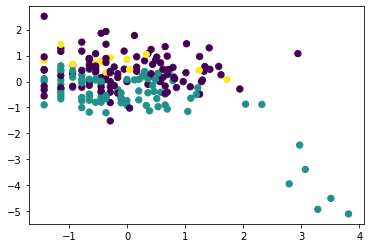

In [36]:
# run GMM 
gmm = mixture.GaussianMixture(n_components=3).fit(X_gmm) # you do not need to know prior
labels = gmm.predict(X_gmm)
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], c=labels, s=40, cmap='viridis'); # you're plotting col 1 and col 2 from array

In [37]:
labels

array([2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 0])

In [38]:
# perform dimensionality reduction across all features 

from sklearn.decomposition import PCA

df_X_gmm = pd.DataFrame(X_gmm) 


In [39]:
pca = PCA(n_components=24) # 25 cols (w/o CRP); your model where you will find EV, loadings etc
principalComponents = pca.fit_transform(df_X_gmm) # fit model on data

In [40]:
principalComponents

array([[ 7.72620887, -1.79445143, -1.19361892, ..., -0.06981422,
        -0.30132757,  0.26766963],
       [-1.10087614,  0.31750502,  0.48951535, ...,  0.18577945,
        -0.23631222,  0.42445361],
       [-1.30587912, -2.29263681, -1.48777242, ...,  0.21259619,
         0.26375262,  0.01920275],
       ...,
       [-0.33568263,  0.65465551, -1.38971117, ..., -0.04814284,
        -0.52967431,  0.48491331],
       [-0.77767573, -0.22507627, -0.70786786, ...,  0.44534022,
         0.15395763, -0.13094849],
       [ 0.05661849,  0.53033416,  2.02314365, ...,  0.1267407 ,
        -0.09293899,  0.32216715]])

In [41]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22',
                          'PC23','PC24'])

In [42]:
# biplot - PC scores, with cluster labels coloured

# make df to plot
toplot = principalDf.copy()
toplot['GMM_labels'] = labels

toplot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,GMM_labels
0,7.726209,-1.794451,-1.193619,0.129696,-0.711770,1.385919,-0.822583,1.129075,-0.847572,0.204621,...,1.662561,0.222568,0.232845,0.569496,0.124713,-0.047197,-0.069814,-0.301328,0.267670,2
1,-1.100876,0.317505,0.489515,0.153209,1.015954,-0.110409,0.199929,0.208259,-1.624829,0.391925,...,0.938952,-0.399760,0.061244,-0.217081,-0.129416,-0.057701,0.185779,-0.236312,0.424454,1
2,-1.305879,-2.292637,-1.487772,0.795299,-0.920676,1.308988,-0.836859,-0.860651,-0.126263,-0.408990,...,-0.651555,-0.328567,0.431962,-0.270342,-0.088899,0.175215,0.212596,0.263753,0.019203,0
3,-1.180062,0.393263,-1.814345,-0.460742,-0.293029,-1.144645,-0.489941,0.065831,0.240849,0.623819,...,-0.076200,0.008011,-0.623849,-0.258389,0.056169,0.219320,0.297428,0.116926,-0.469678,1
4,-0.529381,-0.805218,-0.893270,1.537399,-0.309708,-1.921205,-0.432234,0.354910,0.748692,-1.138925,...,-0.039368,0.618098,-0.047075,-0.101818,0.404955,0.711284,-0.246795,0.336573,0.378870,0


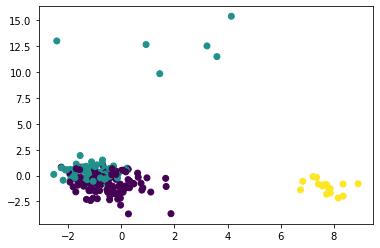

In [43]:
# scatterplot - PC scores, with cluster labels coloured

plt.scatter(toplot['PC1'], toplot['PC2'], c=labels, cmap='viridis') # x,y


In [ ]:
# prep df earlier for loading plot

# make column names for df_X_gmm
df_X_gmm.columns = X_2.columns
df_X_gmm.head()

ValueError: ignored

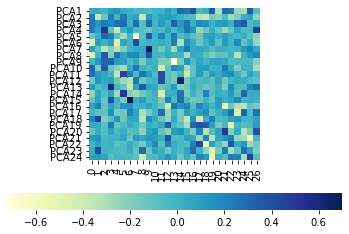

In [43]:
# plot loadings
ax = sb.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df_X_gmm.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [ ]:
df_X_gmm

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.142719,1.210629,-0.002150,0.121644,0.569337,-0.117863,0.847968,0.670539,0.684703,-1.048995,...,0.602269,0.877362,2.715387,-2.781593,1.261296,2.301529,-2.347156,-4.026748,2.546643,0.015469
1,0.200250,-0.363245,0.076020,-0.557759,-0.282099,-0.202743,0.009506,-0.587835,-0.111966,0.826708,...,-0.089219,0.057617,-0.607317,0.556840,-1.012764,-0.174901,0.278647,0.118752,-0.265377,-0.194549
2,-1.142719,1.287081,-0.123481,-1.376693,-1.338247,-0.500252,0.009506,0.166955,0.628799,-1.956701,...,-0.170542,0.248868,0.143974,0.406764,-0.227918,0.287116,1.463617,-0.285051,-0.970779,0.394306
3,-0.003400,-0.919791,-0.236115,-0.433784,0.037164,-0.583569,0.009506,-0.488447,0.317450,-0.923244,...,0.015432,-0.744859,-0.675338,0.485417,-0.405231,-0.348972,-0.827640,-0.068868,-0.878153,-0.368941
4,0.163939,0.554357,0.549172,-1.044847,0.326401,0.710306,0.298722,-1.615116,-0.390942,-0.838140,...,-0.047465,0.253225,-0.942244,0.075451,-0.451006,-0.029038,-0.546272,-0.070114,-0.776131,1.758514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.290428,0.394650,-0.666951,1.733543,2.529972,0.846074,0.068722,-0.141159,0.074867,0.173285,...,1.111525,0.509488,-0.133339,0.277205,1.372450,-0.067543,-0.112919,0.786119,-0.054592,-0.996613
204,0.042287,-1.024549,-0.135605,-0.166915,0.275604,-0.586230,-0.031536,0.510206,-0.443499,-0.086676,...,0.501690,0.382548,0.435031,0.059868,0.919473,0.051132,0.079879,0.245427,0.045471,-0.662962
205,-0.290428,-1.516069,-0.787921,0.531835,-0.064753,-1.205060,0.009506,-1.000935,-0.477752,-0.358120,...,-0.196796,-0.055504,-0.409100,-0.047810,-0.035293,0.295767,-0.441234,-0.266343,-0.009556,-0.327122
206,-1.142719,-0.463606,0.074020,-0.160550,-0.175215,0.067377,0.009506,-2.439246,-0.328325,-0.086676,...,-0.044947,0.377341,0.077046,0.301837,0.723295,0.272863,0.199809,0.618983,-1.055253,-1.661385


In [ ]:
######### Bayesian GMM ########

from sklearn.mixture import BayesianGaussianMixture
n_components=20 # set it to a big number
model = BayesianGaussianMixture(weight_concentration_prior= 1/(5*n_components), n_components=n_components)
model = model.fit(X)

model.weights_ 

In [ ]:
# evaluate cluster weights to retain / selection meaningful ones